In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import collections
import re
import string

In [2]:
data = pd.read_csv('D:/agimaulana/agi/databersih_hasilakhir.csv',index_col=0)

data.head()

,text,sentiment
1,kalo aernya segitumah kolem emangnye gue lele yeh,2
2,aka menteri,2
3,sekda idiot,1
4,air beda banjir,2
5,kemana banjir parah program jalankan prokasih...,1


In [13]:
import csv
meong.to_csv('sampelwawan.csv')

In [11]:
len(meong)

459

In [10]:
meong=data.sample(frac = 0.3) 

In [12]:
meong

,text,sentiment
1092,sekolah dimana sih,1
986,bapa ikan,1
994,makanan kali ah nikmati,2
686,hubungan nya banjir tubuh,2
53,ta e,1
1287,iq jongkok ya murahan,1
716,iya manajemen air buruk,1
1278,ya manajemen airnya dihilangkan,2
1348,barang barang rusak kerja sekolah mash disuruh...,1
1264,dirasain kali manis manisnya,2


In [3]:
data = data[['text','sentiment']]
data['text'].replace('',np.nan,inplace=True)

data.dropna(subset=['text'],inplace=True)

data.sentiment.loc[(data['sentiment']==1)] = 0
data.sentiment.loc[(data['sentiment']==2)] = 1
#data.sentiment.loc[(data['sentiment']==1)] = 'Negatif'
#data.sentiment.loc[(data['sentiment']==2)] = 'Positif'
data.head()

D:\semester 6\anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,text,sentiment
1,kalo aernya segitumah kolem emangnye gue lele yeh,1
2,aka menteri,1
3,sekda idiot,0
4,air beda banjir,1
5,kemana banjir parah program jalankan prokasih...,0


In [4]:
#data_train, data_test = train_test_split(data, test_size=0.30, random_state=42)
data_train, data_test = train_test_split(data, test_size=0.30)
data_train['text']=data_train['text'].values.astype('U')
data_test['text']=data_test['text'].values.astype('U')

D:\semester 6\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\semester 6\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
#vectorizer = TfidfVectorizer(min_df = 5,
 #                            max_df = 0.8,
  #                           sublinear_tf = True,
   #                          use_idf = True)
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(data_train['text'])
test_vectors = vectorizer.transform(data_test['text'])


In [6]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear',C=0.1)
t0 = time.time()
classifier_linear.fit(train_vectors, data_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(data_test['sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['1'])
print('negative: ', report['0'])
y_train_hat=classifier_linear.predict(train_vectors)
y_test_hat=classifier_linear.predict(test_vectors)

#print( "train accuracy= "  ,np.mean(y_train_hat == data_train['sentiment'])*100)
#print ("test accuracy= "  ,np.mean(y_test_hat == data_test['sentiment'])*100)



Training time: 0.201850s; Prediction time: 0.051886s
positive:  {'precision': 0.5907738095238095, 'recall': 0.9589371980676329, 'f1-score': 0.7311233885819521, 'support': 414}
negative:  {'precision': 0.8089887640449438, 'recall': 0.207492795389049, 'f1-score': 0.33027522935779813, 'support': 347}


In [6]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear',C=0.1)
t0 = time.time()
classifier_linear.fit(train_vectors, data_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(data_test['sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['1'])
print('negative: ', report['0'])
y_train_hat=classifier_linear.predict(train_vectors)
y_test_hat=classifier_linear.predict(test_vectors)

#print( "train accuracy= "  ,np.mean(y_train_hat == data_train['sentiment'])*100)
#print ("test accuracy= "  ,np.mean(y_test_hat == data_test['sentiment'])*100)



Training time: 0.208534s; Prediction time: 0.049772s
positive:  {'precision': 0.5909752547307132, 'recall': 0.9830508474576272, 'f1-score': 0.7381818181818182, 'support': 413}
negative:  {'precision': 0.9054054054054054, 'recall': 0.1925287356321839, 'f1-score': 0.31753554502369663, 'support': 348}


In [7]:
import numpy as np
#lin_svm=svm.LinearSVC()
lin_svm= svm.SVC(kernel='linear',C=1)
lin_svm.fit(train_vectors, data_train['sentiment'])
#lin_svm.fit(test_vectors, data_test['sentiment'])
y_train_hat=lin_svm.predict(train_vectors)
y_test_hat=lin_svm.predict(test_vectors)

print( "train accuracy= "  ,np.mean(y_train_hat == data_train['sentiment'])*100)
print ("test accuracy= "  ,np.mean(y_test_hat == data_test['sentiment'])*100)



train accuracy=  95.43661971830986
test accuracy=  73.98160315374507


In [7]:
import numpy as np
#lin_svm=svm.LinearSVC()
lin_svm= svm.SVC(kernel='linear',C=1)
lin_svm.fit(train_vectors, data_train['sentiment'])
#lin_svm.fit(test_vectors, data_test['sentiment'])
y_train_hat=lin_svm.predict(train_vectors)
y_test_hat=lin_svm.predict(test_vectors)

print( "train accuracy= "  ,np.mean(y_train_hat == data_train['sentiment'])*100)
print ("test accuracy= "  ,np.mean(y_test_hat == data_test['sentiment'])*100)



train accuracy=  96.11267605633803
test accuracy=  72.53613666228647


In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [9]:
plot_confusion_matrix(classifier_linear, y_train_hat, y_test_hat)
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 0. ... 1. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
#from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

In [13]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=5, shuffle=True, random_state=1)

In [14]:

pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(train_vectors, y_train_hat)
grid_svm.score(test_vectors, y_test_hat)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   20.0s finished


AttributeError: lower not found

In [26]:
grid_svm.best_params_

{'svc__C': 0.01}

In [27]:
grid_svm.best_score_

0.7188464007657905

In [29]:
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        

    auc = roc_auc_score(y, pred_proba)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'auc': auc, 'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result

In [46]:
report_results(grid_svm.best_estimator_, test_vectors, y_test_hat)

D:\semester 6\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\semester 6\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'auc': 0.27629746835443036,
 'f1': 0.0,
 'acc': 0.6550218340611353,
 'precision': 0.0,
 'recall': 0.0}

In [32]:
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr

In [33]:
roc_svm = get_roc_curve(grid_svm.best_estimator_, test_vectors, y_test_hat)

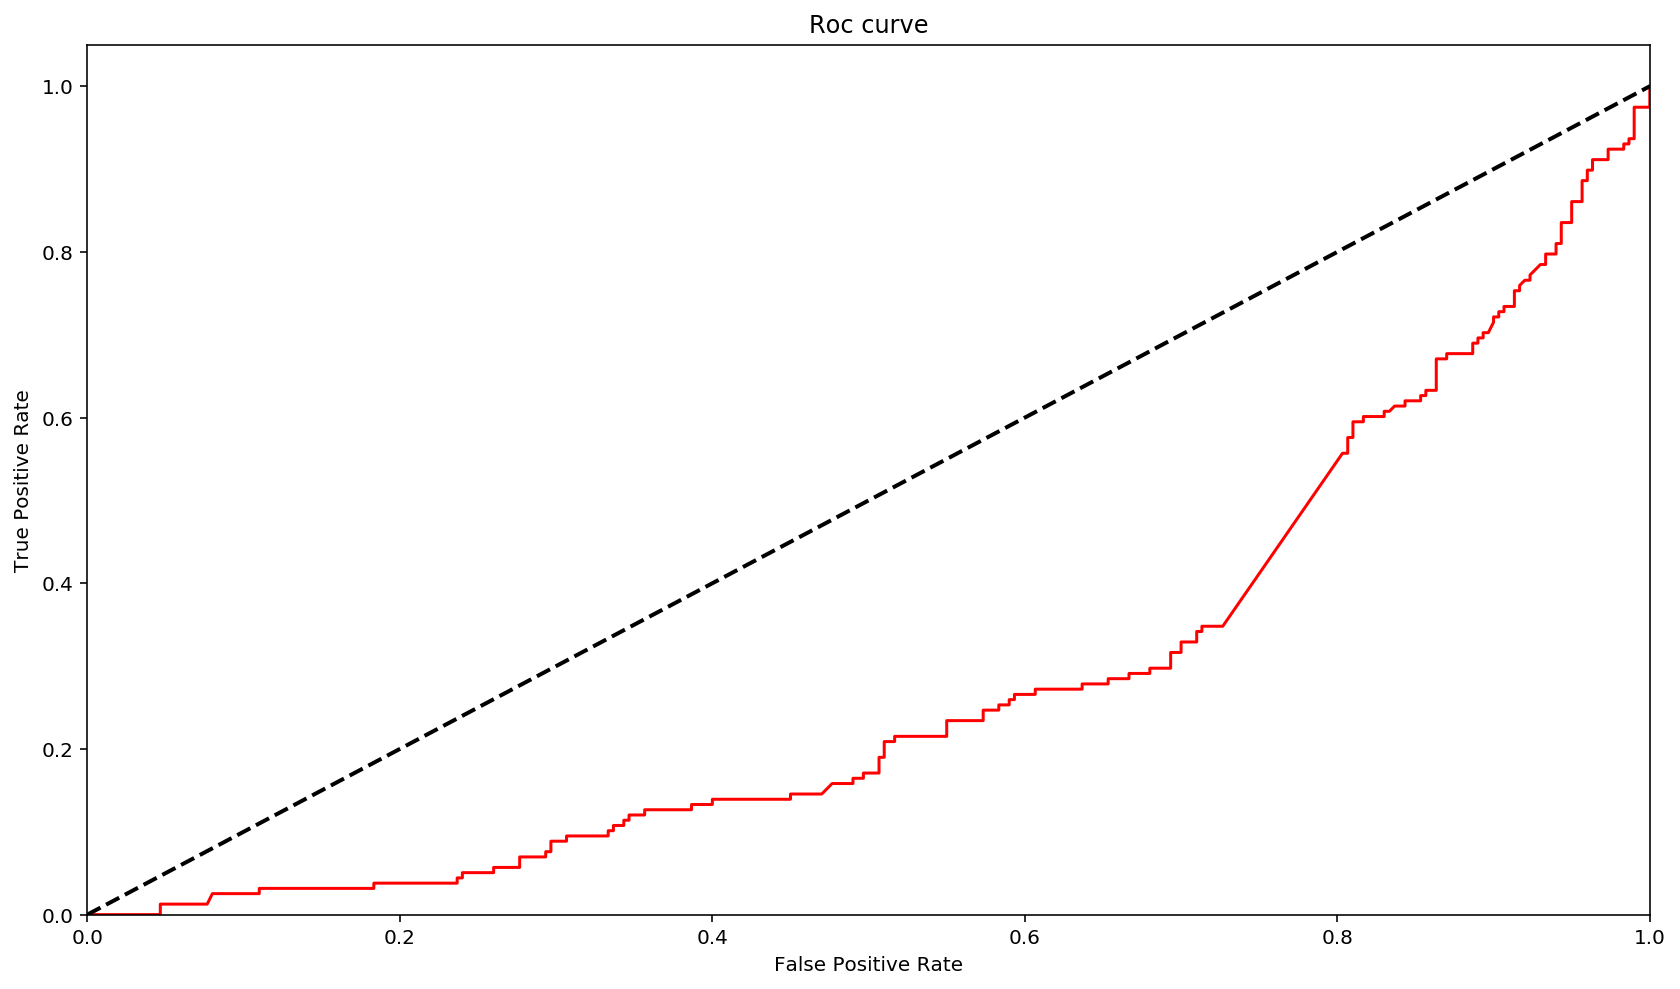

In [34]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

In [37]:
X_train=train_vectors
y_train=y_train_hat
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, X_train, y_train, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

In [40]:
def plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title='',
ylim=None, figsize=(14,8)):

    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt

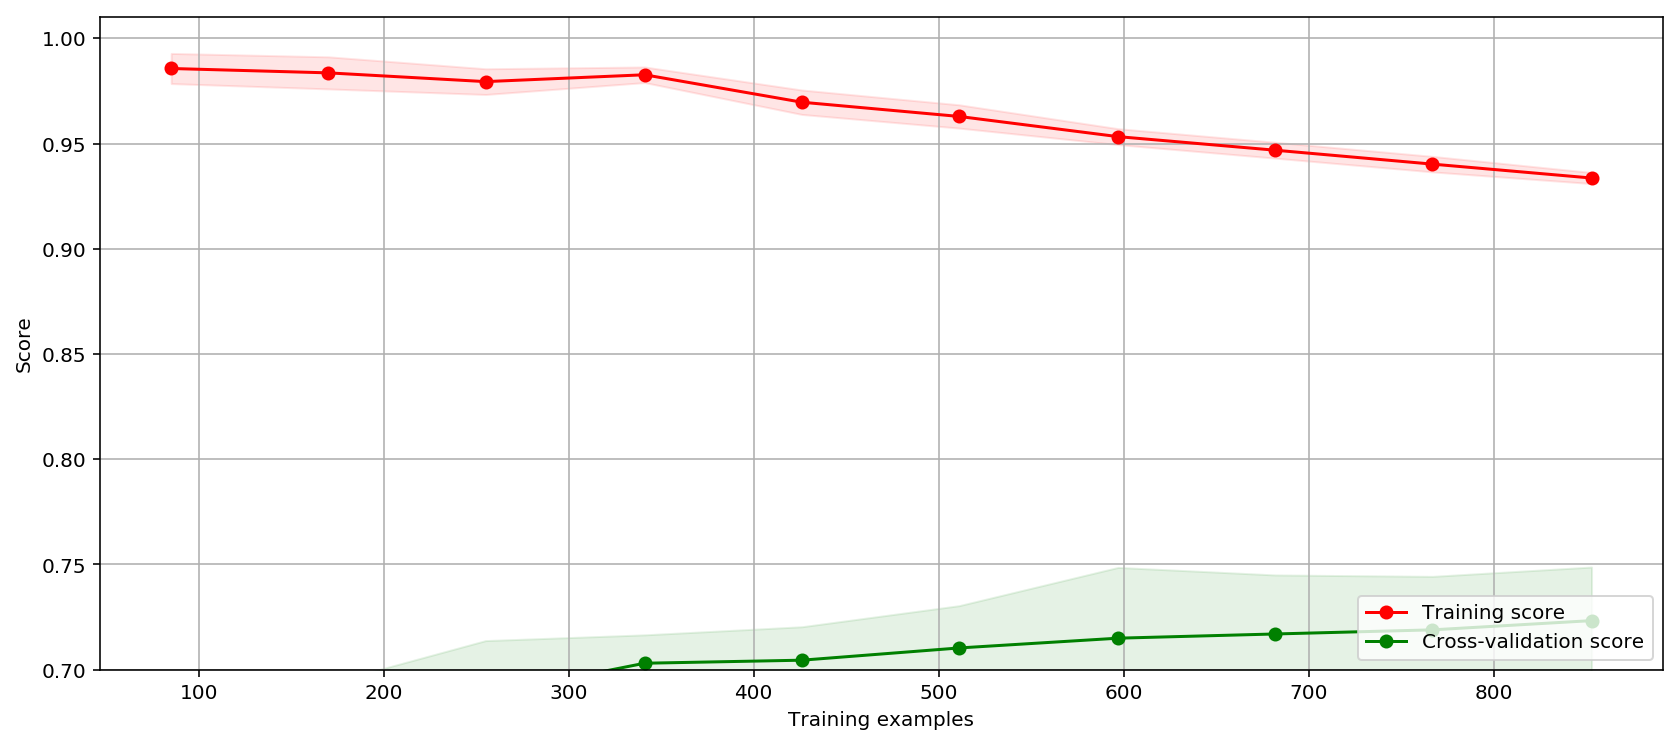

In [41]:
plot_learning_curve(X_train, y_train, train_sizes, 
                    train_scores, test_scores, ylim=(0.7, 1.01), figsize=(14,6))
plt.show()

In [ ]:
from sklearn import metrics
sm = svc.fit(X_train,y_train)
y_pred = sm.predict(X_test)
metrics.accuracy_score(y_test,y_pred)